<a href="https://colab.research.google.com/github/StratagemGIS/notebooks/blob/main/data_processing/07_contextily_basemap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install contextily

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 22.3 MB/s eta 0:00:00


In [ ]:
import contextily as cx
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import pooch

In [ ]:
nb_drill_holes = pooch.retrieve(
    'https://github.com/StratagemGIS/datasets/raw/main/table/exploration_drillholes_geonb_apr26_2024.csv',
    known_hash='a089f95489a6c7054be13c19ee5f8a691969d94ca395d733e9a5eb7f8735f987'
)

In [ ]:
drills = pd.read_csv(nb_drill_holes)

drills = gpd.GeoDataFrame(
    drills[['OBJECTID', 'YEARDRILLED', 'LENGTH_M']],
    geometry=gpd.points_from_xy(drills.X, drills.Y),
    crs='EPSG:4326'
).to_crs('EPSG:2953')

drills.head()

,OBJECTID,YEARDRILLED,LENGTH_M,geometry
0,1,1969.0,44.1960,POINT (2626197.000 7428660.000)
1,2,1969.0,34.1376,POINT (2628154.000 7429084.000)
2,3,1969.0,20.7264,POINT (2632862.000 7430982.000)
3,4,1993.0,41.1000,POINT (2643765.000 7431099.000)
4,5,1993.0,43.9000,POINT (2643710.000 7431258.000)


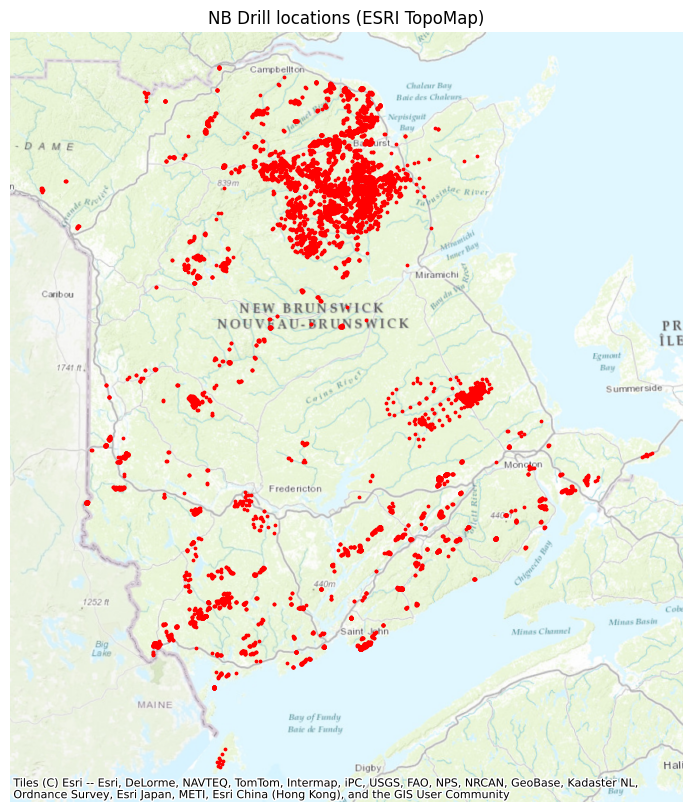

In [ ]:
ax = drills.plot(
    figsize=(10, 10),
    markersize=3,
    color='red'
)

plt.axis('off')
plt.title('NB Drill locations (ESRI TopoMap)')

cx.add_basemap(ax, crs=drills.crs, source=cx.providers.Esri.WorldTopoMap)
plt.savefig('nb_drill_locations_esri.png', bbox_inches='tight', dpi=600)

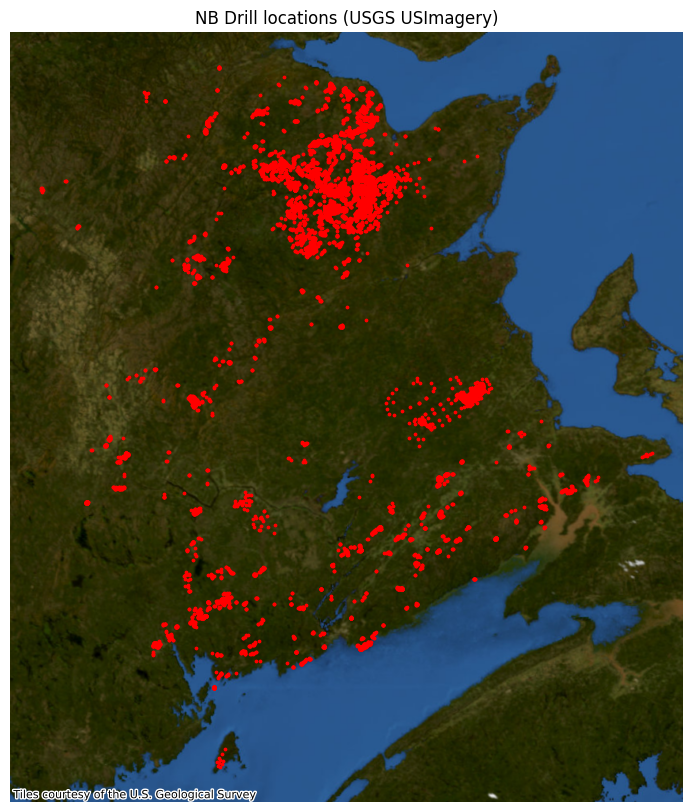

In [ ]:
ax = drills.plot(
    figsize=(10, 10),
    markersize=3,
    color='red'
)

plt.axis('off')
plt.title('NB Drill locations (USGS USImagery)')

cx.add_basemap(ax, crs=drills.crs, source=cx.providers.USGS.USImagery)
plt.savefig('nb_drill_locations_usgs.png', bbox_inches='tight', dpi=600)

# Full Code

In [ ]:
"""
Vaasudevan Srinivasan 🧑🏻‍💻
StratagemGIS Solutions
Script to include basemaps to matplotlib plots
"""


# !pip install contextily

import contextily as cx
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd


# Read the CSV file
drills = pd.read_csv(nb_drill_holes)

# Convert to Geodataframe
drills = gpd.GeoDataFrame(
    drills[['OBJECTID', 'YEARDRILLED', 'LENGTH_M']],
    geometry=gpd.points_from_xy(drills.X, drills.Y),
    crs='EPSG:4326'
).to_crs('EPSG:2953')

# Plot the coordinates
ax = drills.plot(figsize=(10, 10), markersize=3, color='red')
plt.axis('off')
plt.title('NB Drill locations')

# Choose the basemap
cx.add_basemap(ax, crs=drills.crs, source=cx.providers.Esri.WorldTopoMap)
cx.add_basemap(ax, crs=drills.crs, source=cx.providers.USGS.USImagery)
